In [1]:
from pymongo import MongoClient
from bson.objectid import ObjectId

import time,datetime
import os

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

from copy import deepcopy
from IPython.display import clear_output

In [2]:
start = datetime.datetime(2019,5,28).timestamp()
end = datetime.datetime(2019,5,29).timestamp()

In [217]:
conn = MongoClient('120.126.136.17')
db = conn.Tracker
collection = [db.prediction]# db.db2, db.dn2, db.james, db.leo
clean_data = []
for col in collection:
    cursor = col.find({'year': 2019, 'month' : 5, 'day':16})
    df = pd.DataFrame(list(cursor))
# df['step_value'].replace('', 0, inplace=True)
# df.replace('', np.nan, inplace=True)
# df.fillna(method='ffill', inplace=True)
dfnew = df.loc[(df['user'] == 'james') & (df['type'] == 'hourly')]
# dfnew['day'] = 31
# dfnew['user'] = 'james'
dfnew = dfnew['prediction'].reset_index().drop('index',axis=1)

In [218]:
dfnew = dfnew[0:24]

In [219]:
conn = MongoClient('120.126.136.17')
db = conn.Tracker
collection = [db.james]# db.db2, db.dn2, db.james, db.leo
clean_data = []
for col in collection:
    cursor = col.find({'year': 2019, 'month' : 5, 'day':16})
    df = pd.DataFrame(list(cursor))
df['step_value'].replace('', 0, inplace=True)
# df.replace('', np.nan, inplace=True)
# df.fillna(method='ffill', inplace=True)

df['step_value'] = df['step_value'].astype(float)

In [220]:
lis = []
for i in range(24):
    lis.append(int(df.loc[df['hour'] == i, ['step_value']].sum()))

In [221]:
dfnew['real'] = lis

<IPython.core.display.Javascript object>


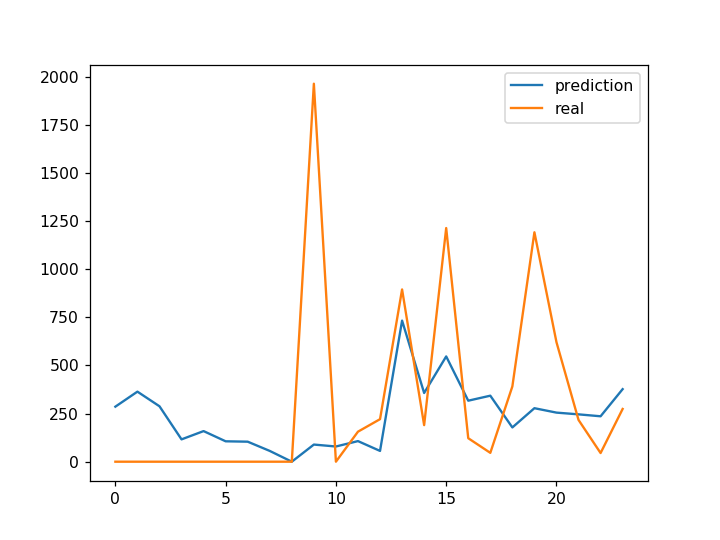

In [222]:
# 5/16
%matplotlib notebook
dfnew.plot()

In [143]:
dfnew = dfnew.reset_index()
dfnew = dfnew.drop(['_id', 'index'],axis=1)

<IPython.core.display.Javascript object>


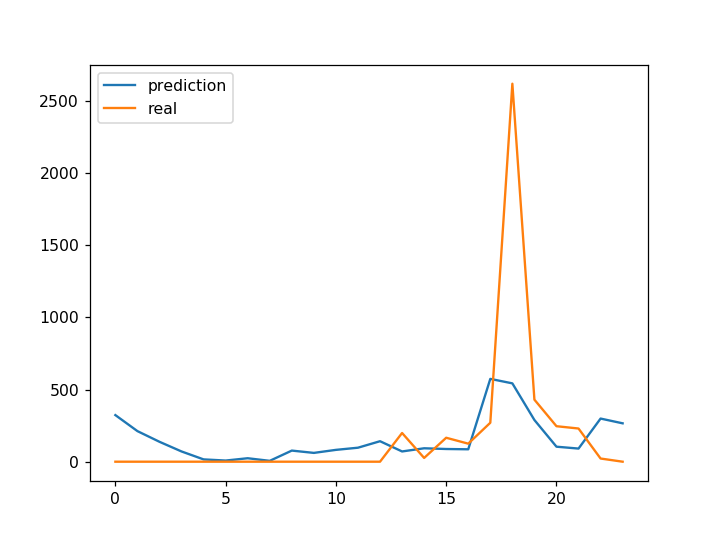

In [150]:
# 5/25
%matplotlib notebook
dfnew.plot()

In [144]:
collection = db.prediction
records = dfnew.to_dict('records') # 參數 record 代表把列轉成個別物件
collection.insert_many(records)